## Introduction - Megaline Newer Plans Recommendation: Smart or Ultra

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

The subscribers have already switched to the new plans.For this classification task, we need to develop a model that will pick the right plan. 

### Data Description

Every observation in the dataset contains monthly behavior information about one user. 

The information given is as follows:
1. сalls — number of calls,
2. minutes — total call duration in minutes,
3. messages — number of text messages,
4. mb_used — Internet traffic used in MB,
5. is_ultra — plan for the current month (Ultra - 1, Smart - 0).

## Initialising & Loading Data

### Initialisation

Loading all libararies for our working.

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math as mt
import math
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Load Data

Read & load the raw data

In [2]:
df = pd.read_csv("/datasets/users_behavior.csv")

## Preparing the Data

### General Data Info

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


(3214, 5)

There are 3,214 rows of records and 5 columns named 'calls', 'minutes', 'messages', 'mb_used' & 'is_ultra' for the dataset that we named as 'df'.

1. сalls — number of calls,
2. minutes — total call duration in minutes,
3. messages — number of text messages,
4. mb_used — Internet traffic used in MB,
5. is_ultra — plan for the current month (Ultra - 1, Smart - 0).

In [4]:
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


### Changing Data Type

Change the data type of 'is_ultra' to boolean as it is either ultra plan or not ultra plan subsriber.

In [5]:
df['is_ultra'] = df['is_ultra'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 103.7 KB


### Dealing with Missing Values

In [6]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

There is no missing value.

### Checking for Duplicates

In [7]:
df.duplicated().sum()

0

There is no duplicate values.

### Checking Data Distribution with Initial Descriptive Statistics

In [8]:
df.describe()

,calls,minutes,messages,mb_used
count,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836
std,33.236368,234.569872,36.148326,7570.968246
min,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500
50%,62.000000,430.600000,30.000000,16943.235000
75%,82.000000,571.927500,57.000000,21424.700000
max,244.000000,1632.060000,224.000000,49745.730000


From the initial descriptive statistics, we have the below observations:

1. for calls - minimum is 0 and maximum is 244
2. for call durations - minimum is 0 and maximum is 1,632 minutes
3. for messages - minimum is 0 and maximum is 224
4. for mb_used - minimum is 0 and maximum is 49,745 mb.

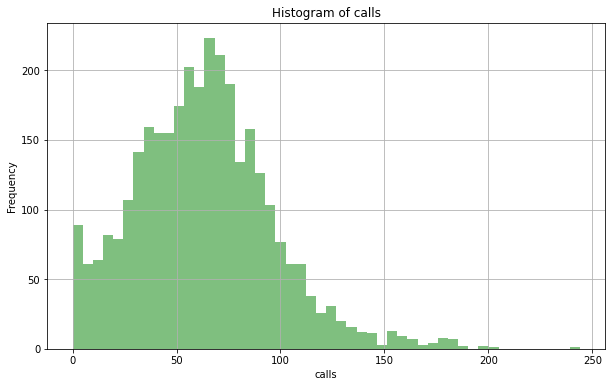

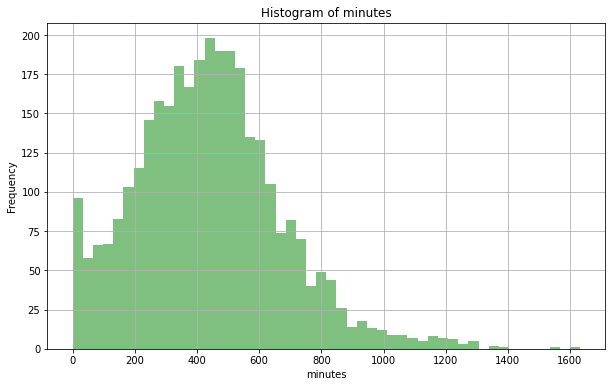

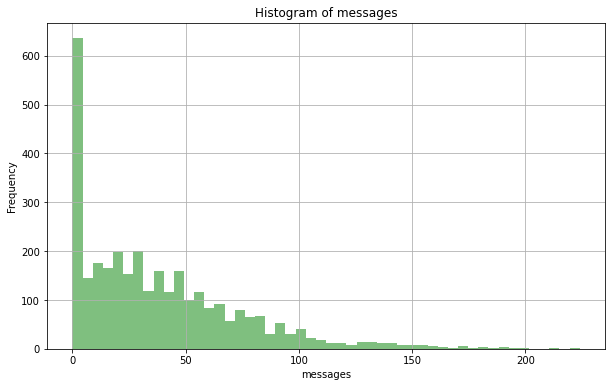

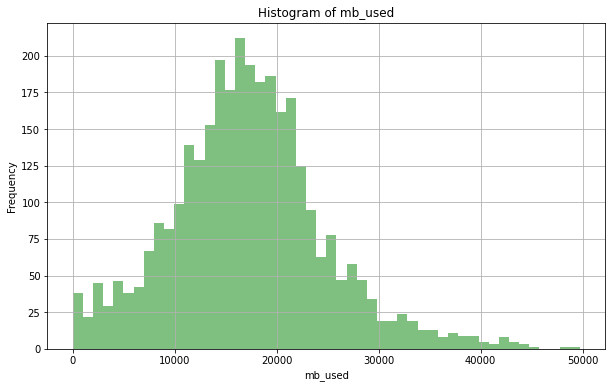

In [9]:
columns = ['calls', 'minutes', 'messages', 'mb_used']

for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=50, alpha=0.5, color='g')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Model Development

Split the source data into a training set, a validation set, and a test set in the split ratio of 60:20:20.

In [10]:
# Split the data as 60% training, 20% validation, and 20% test
# First, split into train and test sets (80% train, 20% test)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Next, split the train set into train and validation sets (75% train, 25% validation)
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=42) 

In [11]:
display('Rows & columns for df_train: ', df_train.shape)
display('Rows & columns for df_valid: ', df_valid.shape)
display('Rows & columns for df_test: ', df_test.shape)

'Rows & columns for df_train: '

(1928, 5)

'Rows & columns for df_valid: '

(643, 5)

'Rows & columns for df_test: '

(643, 5)

In [14]:
X_train = df_train.drop(['is_ultra'], axis=1)
y_train = df_train['is_ultra']
X_valid = df_valid.drop(['is_ultra'], axis=1)
y_valid = df_valid['is_ultra']
X_test = df_test.drop(['is_ultra'], axis=1)
y_test = df_test['is_ultra']

### Decision Tree Regression

In [15]:
# < create a loop for max_depth from 1 to 5 >
for depth in range(1, 6):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # < create a model, specify max_depth=depth >

        # < train the model >
        model.fit(X_train, y_train)
        predictions_valid = model.predict(X_valid) # < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(y_valid, predictions_valid))

max_depth = 1 : 0.7418351477449455
max_depth = 2 : 0.7744945567651633
max_depth = 3 : 0.7744945567651633
max_depth = 4 : 0.7807153965785381
max_depth = 5 : 0.7713841368584758


We are tyring max_depth  of Decision Tree from 1 to 5, and the highest accuracy score is with max_depth of 4, which is 0.78.

### Random Forest Regression

In [16]:
best_score = 0
best_est = 0
for est in range(1, 100, 10): # choose hyperparameter range
    model = RandomForestClassifier(random_state=54321, n_estimators=est) # set number of trees
    model.fit(X_train,y_train) # train model on training set
    score = model.score(X_valid, y_valid) # calculate accuracy score on validation set
    if score > best_score:
        best_score = score # save best accuracy score on validation set
        best_est = est # save number of estimators corresponding to best accuracy score

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

Accuracy of the best model on the validation set (n_estimators = 41): 0.7931570762052877


We are trying to build the model with number of estimators from 1 to 100. And number of estimators 41 gave us the best accuracy score, which is 0.79.

### Logistic Regression

In [17]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(X_train, y_train)  # train model on training set
score_train = model.score(X_train, y_train) # calculate accuracy score on training set 
score_valid = model.score(X_valid, y_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train)
print("Accuracy of the logistic regression model on the validation set:",score_valid)

Accuracy of the logistic regression model on the training set: 0.703838174273859
Accuracy of the logistic regression model on the validation set: 0.7216174183514774


We are trying to build the Logistic Regression model, and the accuracy score on training set is 0.70 while it is 0.72 on validation set.

### Sanity Checking on all 3 Models

The highest accuracy score is Random Forest Regression model, 0.79 follow by Decision Tree Regression model, 0.78. The lowest accuracy score is Logistic Regression model which is 0.70.

The Random Forest Regression model with highest accuracy score has hyperparameter that number of estimators is 8. Thus we will be using Random Forest Regression as our model.

But before that, we need to do a baseline check for sanity check, called Dummy Classifier.

A Dummy Classifier in machine learning is a type of classifier that does not generate any insight about the data and classifies the given data using only simple rules. It’s used as a simple baseline for other classifiers, meaning any other classifier is expected to perform better on the given dataset. A Dummy Classifier serves as a simple baseline to compare against other (more complex) classifiers. It’s especially useful for datasets where there’s a class imbalance.

The strategy used is ‘most_frequent’, meaning the classifier always predicts the most frequent class label in the training data.

In [18]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent', random_state=42)

#establishing random_state for reproducibility

clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)
score = clf_dummy.score(X_test, y_test)
display(score)

0.7076205287713841

Dummy Classifier has achieved an accuracy of approximately 70.76%. This is the baseline model, and it’s quite common for the baseline model not to have a very high accuracy.

The score we have obtained is the baseline performance. Any other machine learning model we use should ideally perform better than this. If not, we might need to revisite our feature selection, data preprocessing steps, or model choice.

The Dummy Classifier doesn’t learn anything from the data and its predictions are based solely on the class distribution of the training set (or are random, depending on the strategy used). It’s a simple tool to provide a sanity check and a baseline for other models.

### Checking the Quality of the Selected Model using the test set (df_test)

In [19]:
final_model = RandomForestClassifier(random_state=54321, n_estimators=41)
final_model.fit(X_train, y_train)
final_model.score(X_valid, y_valid)

0.7931570762052877

The accuracy score for the validation dataset is 79.32%.

In [20]:
final_model.score(X_test, y_test)

0.7978227060653188

The accuracy score for the test dataset is 79.78%, which is higher than Dummy Classifier (70%).

## Conclusion

In this project, the threshold for accuracy is 0.75. But the accuracy of test set using Randam Forest Regression model is 0.7978 (79.78%). Thus, Ultra plan is recommended based on the subscribers' behavior.